In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("emails.csv")

In [3]:
df = data.copy()

In [4]:
df.shape

(5172, 3002)

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# input data
x = df.drop(["Email No.", "Prediction"], axis=1)

# output data
y = df["Prediction"]

In [7]:
x.shape

(5172, 3000)

In [8]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [9]:
set(x.dtypes)

{dtype('int64')}

In [10]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [11]:
# feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [14]:
x_train.shape

(3879, 3000)

In [15]:
x_test.shape

(1293, 3000)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)

87.1616395978345 %


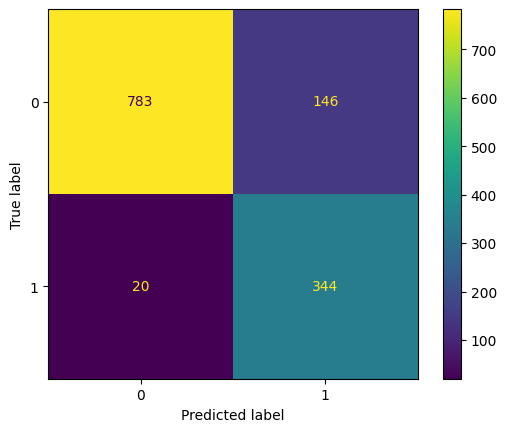

In [19]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
acc = acc*100
print(acc , "%")

In [20]:
from sklearn.svm import SVC

In [21]:
svm = SVC(kernel="linear")

In [22]:
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

97.6798143851508 %


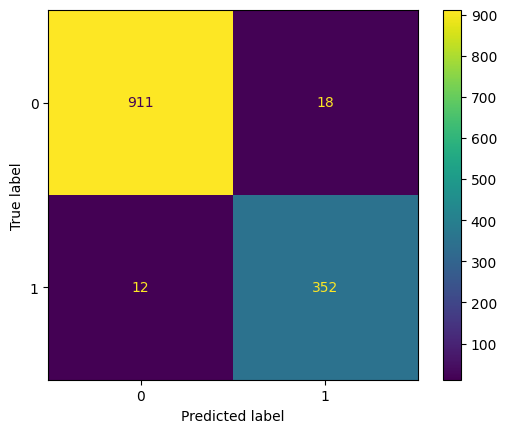

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
acc = acc*100
print(acc , "%")